In [1]:
import pandas as pd
import numpy as np

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

In [3]:
SEED = 42
np.random.seed(SEED)

# Model

In [4]:
df = pd.read_csv("user_information.csv")

y = df.pop("default")

x = df.select_dtypes(include=["object"]).columns
x = pd.get_dummies(df, columns=x)

In [5]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.25)

In [6]:
lr = LogisticRegression(max_iter=1000)
lr.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
lr.score(test_x, test_y)

0.764

# Model Analysis

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
pred_y = lr.predict(test_x)

In [25]:
prec = precision_score(test_y, pred_y)

print(f"Precisão = {round(prec*100, 2)}%")

Precisão = 61.4%


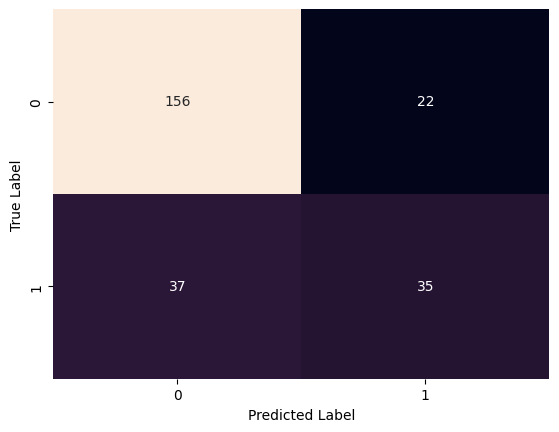

In [40]:
matrix = confusion_matrix(test_y, pred_y)
graph = sns.heatmap(matrix, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

graph = graph

In [43]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       178
           1       0.61      0.49      0.54        72

    accuracy                           0.76       250
   macro avg       0.71      0.68      0.69       250
weighted avg       0.75      0.76      0.76       250

